In [1]:
import uproot, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [8]:
## Read Electron Total Resolution
df = pd.read_table("../../../Simulation/Nonlinearity/electron/Cerenkov/totPE_smearing.txt", sep=' ')
electron_totpe = df['totpe'].values
electron_sigma = df['sigma'].values

df = pd.read_table("../../../Simulation/Nonlinearity/electron/Cerenkov/quench_smearing.txt", sep=' ')
electron_totpe_noC = df['totpe'].values
electron_sigma_noC = df['sigma'].values

In [26]:
def abc_model(a,b,c,A,x):
    #print()
    return np.sqrt(a**2/x+b**2+c**2/x**2)*x*A

In [40]:
abcmodel_noC = [];
for i in electron_totpe_noC:
    abcmodel_noC.append(abc_model(0.02674, 0.001453, 0.0008227, 1422.47, i/1422.47, ))
    
abcmodel = [];
for i in electron_totpe:
    abcmodel.append(abc_model(0.02645, 0.006303, 0.00, 1481.06, i/1481.06 ))
    

In [47]:
def new_model(a,b,A,x):
    return np.sqrt(a*a/x+b*b*x)*x*A

newmodel = [];
for i in electron_totpe:
    newmodel.append(new_model(0.02672, 0.002278, 1481.06, i/1481.06 ))
    

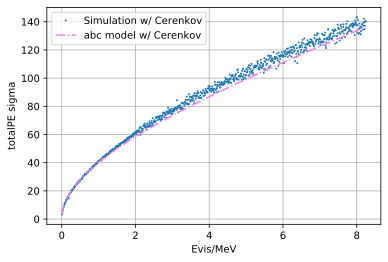

In [49]:
plt.plot(electron_totpe/1481.06, electron_sigma, 'o', ms=1, label="Simulation w/ Cerenkov")
plt.plot(electron_totpe/1481.06, abcmodel, '-.', ms=2, label="abc model w/ Cerenkov", color='violet')
#plt.plot(electron_totpe/1481.06, newmodel, '-.', ms=2, label="new model w/ Cerenkov", color='chocolate')


#plt.plot(electron_totpe_noC/1422.47, electron_sigma_noC, 'o', ms=1, label='Simulation w/o Cerenkov')
#plt.plot(electron_totpe_noC/1422.47, abcmodel_noC, '--', ms=2, label="abc model w/o Cerenkov")
plt.xlabel("Evis/MeV"); plt.ylabel("totalPE sigma"); plt.legend(); plt.grid(True)